# Data Preparation

## Importing Library

In [ ]:
import numpy as np
import pandas as pd
pd.options.display.max_columns=100

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, roc_curve, precision_recall_curve, auc, confusion_matrix
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score


from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Data Selection

In [ ]:
# Membaca dataset penelitian
df = pd.read_excel('/content/drive/MyDrive/SKRIPSI/penelitian-si-2013-lanjutan(1).xls')
df.drop(['nama'],axis=1, inplace=True)
pivoted_df = df.pivot(index='nim', columns='smt', values=['sks','ips'])

# Reset indeks dan beri nama kolom yang lebih deskriptif
pivoted_df.reset_index(inplace=True)
pivoted_df.columns = ['nim', 'sks', 'sks1','sks2','sks3','sks4','sks5','sks6','sks7',
                      'sks8', 'sks9', 'sks10', 'sks11', 'sks12', 'sks13', 'sks14',
                      'ips', 'ips1','ips2','ips3','ips4','ips5', 'ips6','ips7','ips8',
                      'ips9', 'ips10', 'ips11', 'ips12','ips13', 'ips14']

pivoted_df.drop(['sks', 'ips'], axis=1, inplace=True) # Membuang beberapa variable
pivoted_df.fillna(0, inplace=True) # Mengganti missing value dengan nilai 0

pivoted_df

,nim,sks1,sks2,sks3,sks4,sks5,sks6,sks7,sks8,sks9,sks10,sks11,sks12,sks13,sks14,ips1,ips2,ips3,ips4,ips5,ips6,ips7,ips8,ips9,ips10,ips11,ips12,ips13,ips14
0,1113093000001,23.0,21.0,20.0,21.0,27.0,19.0,19.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,3.48,3.38,3.20,3.24,3.22,3.68,3.79,4.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1113093000002,23.0,21.0,20.0,19.0,24.0,19.0,19.0,8.0,0.0,0.0,0.0,0.0,0.0,3.0,3.70,3.10,3.35,3.16,3.25,2.84,3.63,3.0,0.0,0.0,0.0,0.0,0.0,4.0
2,1113093000003,23.0,24.0,20.0,21.0,27.0,19.0,19.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.35,2.88,3.85,3.81,3.22,3.68,3.58,0.0,0.0,0.0,0.0,0.0,0.0,3.0
3,1113093000004,23.0,21.0,20.0,21.0,24.0,19.0,19.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,3.70,3.76,3.55,3.71,3.71,3.68,3.89,4.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1113093000005,23.0,21.0,20.0,21.0,24.0,19.0,16.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,3.70,3.67,3.20,4.00,3.67,3.53,3.63,4.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
742,11220930000123,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.65,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
743,11220930000126,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.39,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
744,11220930000128,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.61,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
745,11220930000129,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.96,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Membaca dataset penelitian
df1 = pd.read_excel('/content/drive/MyDrive/SKRIPSI/penelitian-si-2013.xls')

# Menggabungkan 2 dataset
merge_df = pd.merge(df1, pivoted_df, on='nim', how='outer')
merge_df = merge_df[~merge_df['status'].isin(['Cuti', 'Drop Out', 'Mengundurkan Diri', 'Tidak Aktif'])].reset_index(drop=True)
merge_df.drop(['ukt','do','cuti','selisih usia masuk','selisih usia lulus', 'tgl_lahir'], axis=1, inplace=True)
merge_df

,nim,nama,kota,usia,jenis_kelamin,jalur_masuk,tahun_masuk,tahun_lulus,sks,ipk,penghasilan_ortu,status,tepat waktu,lama studi,usia_masuk,usia_kelulusan,sks1,sks2,sks3,sks4,sks5,sks6,sks7,sks8,sks9,sks10,sks11,sks12,sks13,sks14,ips1,ips2,ips3,ips4,ips5,ips6,ips7,ips8,ips9,ips10,ips11,ips12,ips13,ips14
0,1113093000001,NITA ALFIANI,Kota Tangerang Selatan,27,Perempuan,SNBP,2013,2018.0,163.0,3.46,4000001-6000000,Lulus,N,5.0,17,22.0,23.0,21.0,20.0,21.0,27.0,19.0,19.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,3.48,3.38,3.20,3.24,3.22,3.68,3.79,4.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1113093000002,ALDINO WIDYA KURNIAWAN,Kota Bogor,27,Laki-laki,SNBP,2013,2020.0,156.0,3.29,2000001-4000000,Lulus,N,7.0,17,24.0,23.0,21.0,20.0,19.0,24.0,19.0,19.0,8.0,0.0,0.0,0.0,0.0,0.0,3.0,3.70,3.10,3.35,3.16,3.25,2.84,3.63,3.0,0.0,0.0,0.0,0.0,0.0,4.0
2,1113093000004,HERSY AYU QADRYA,Kota Administrasi Jakarta Selatan,27,Perempuan,SNBP,2013,2017.0,160.0,3.74,> 6.000.000,Lulus,Y,4.0,17,21.0,23.0,21.0,20.0,21.0,24.0,19.0,19.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,3.70,3.76,3.55,3.71,3.71,3.68,3.89,4.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1113093000005,ARBAITI DAMANIK,Kota Tangerang Selatan,27,Perempuan,SNBP,2013,2017.0,157.0,3.66,<1.000.000,Lulus,Y,4.0,17,21.0,23.0,21.0,20.0,21.0,24.0,19.0,16.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,3.70,3.67,3.20,4.00,3.67,3.53,3.63,4.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1113093000006,TYAS ROSIANA DEWI,Kota Tangerang,28,Perempuan,SNBP,2013,2017.0,160.0,3.63,<1.000.000,Lulus,Y,4.0,18,22.0,23.0,21.0,20.0,21.0,24.0,19.0,19.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,3.61,3.67,3.35,3.52,3.63,3.53,3.89,4.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1070,11220930000132,RAMADHAN NOVRIANSYAH BINTANG RADITYA,Kota Administrasi Jakarta Barat,19,Laki-laki,SPMB Mandiri - Reguler,2022,NaN,23.0,3.35,4000001-6000000,Aktif,NaN,NaN,18,NaN,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.35,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1071,11220930000133,RISKA FITRIA,Kota Depok,19,Perempuan,SPMB Mandiri - Reguler,2022,NaN,23.0,3.00,2000001-4000000,Aktif,NaN,NaN,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1072,11220930000134,ZALFA RAFI PUTRA,Kota Tangerang Selatan,18,Laki-laki,SPMB Mandiri - Reguler,2022,NaN,20.0,3.20,4000001-6000000,Aktif,NaN,NaN,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1073,11220930000135,HENDRIL RIFAL,Kabupaten Tangerang,19,Laki-laki,SPMB Mandiri - Reguler,2022,NaN,10.0,2.50,2000001-4000000,Aktif,NaN,NaN,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Melihat fitur ips 7 dengan nilai selain nol
merge_df[merge_df['ips7']!= 0].reset_index(drop=True)

In [ ]:
# Melakukan download terhadap dataset visualisasi dalam bentuk file excel
merge_df.to_excel('data_visualisasi.xlsx')

In [ ]:
# Mengambil nilai dataset yang memiliki tahun masuk kurang dari 2020
data_model = merge_df[merge_df['tahun_masuk'] <= 2019].drop([
              'nim','kota','usia','tahun_masuk','tahun_lulus','status',
              'lama studi','usia_masuk','usia_kelulusan'
              ], axis=1)

data_model.tail()

,nama,jenis_kelamin,jalur_masuk,sks,ipk,penghasilan_ortu,tepat waktu,sks1,sks2,sks3,sks4,sks5,sks6,sks7,sks8,sks9,sks10,sks11,sks12,sks13,sks14,ips1,ips2,ips3,ips4,ips5,ips6,ips7,ips8,ips9,ips10,ips11,ips12,ips13,ips14
716,KOMARUDIN,Laki-laki,SPMB Mandiri - Reguler,153.0,3.61,<1.000.000,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
717,RIFQI RAHMA GUNAWAN,Laki-laki,SPMB Mandiri - Reguler,107.0,2.93,4000001-6000000,N,22.0,15.0,13.0,14.0,16.0,12.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.27,3.33,2.54,2.14,3.00,2.75,3.13,0.0,0.0,0.0,0.0,0.0,0.0,0.0
718,ARIIQ VADI,Laki-laki,SPMB Mandiri - Reguler,150.0,3.69,4000001-6000000,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
719,AKSYARIALDI BAYHAKI ALLI,Laki-laki,SPMB Mandiri - Reguler,128.0,3.19,4000001-6000000,N,19.0,14.0,17.0,18.0,21.0,19.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.89,3.36,2.35,2.89,3.19,3.26,3.30,0.0,0.0,0.0,0.0,0.0,0.0,0.0
720,ABDALLAH ROOSEVELT,Laki-laki,SPMB Mandiri - Reguler,120.0,2.78,1.000.000-2.000.000,N,19.0,18.0,13.0,18.0,13.0,19.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.32,2.61,3.23,1.44,3.23,2.58,3.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
data_model.isnull().sum()

nama                  0
jenis_kelamin         0
jalur_masuk           0
sks                   0
ipk                   0
penghasilan_ortu      0
tepat waktu           0
sks1                288
sks2                288
sks3                288
sks4                288
sks5                288
sks6                288
sks7                288
sks8                288
sks9                288
sks10               288
sks11               288
sks12               288
sks13               288
sks14               288
ips1                288
ips2                288
ips3                288
ips4                288
ips5                288
ips6                288
ips7                288
ips8                288
ips9                288
ips10               288
ips11               288
ips12               288
ips13               288
ips14               288
dtype: int64

# Data Preprocessing

In [ ]:
# Melakukan drop terhadap missing value yang ada pada data
data_model.dropna(inplace=True)
data_model = data_model.reset_index(drop=True)
data_model

,nama,jenis_kelamin,jalur_masuk,sks,ipk,penghasilan_ortu,tepat waktu,sks1,sks2,sks3,sks4,sks5,sks6,sks7,sks8,sks9,sks10,sks11,sks12,sks13,sks14,ips1,ips2,ips3,ips4,ips5,ips6,ips7,ips8,ips9,ips10,ips11,ips12,ips13,ips14
0,NITA ALFIANI,Perempuan,SNBP,163.0,3.46,4000001-6000000,N,23.0,21.0,20.0,21.0,27.0,19.0,19.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,3.48,3.38,3.20,3.24,3.22,3.68,3.79,4.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ALDINO WIDYA KURNIAWAN,Laki-laki,SNBP,156.0,3.29,2000001-4000000,N,23.0,21.0,20.0,19.0,24.0,19.0,19.0,8.0,0.0,0.0,0.0,0.0,0.0,3.0,3.70,3.10,3.35,3.16,3.25,2.84,3.63,3.0,0.0,0.0,0.0,0.0,0.0,4.0
2,HERSY AYU QADRYA,Perempuan,SNBP,160.0,3.74,> 6.000.000,Y,23.0,21.0,20.0,21.0,24.0,19.0,19.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,3.70,3.76,3.55,3.71,3.71,3.68,3.89,4.0,0.0,0.0,0.0,0.0,0.0,0.0
3,ARBAITI DAMANIK,Perempuan,SNBP,157.0,3.66,<1.000.000,Y,23.0,21.0,20.0,21.0,24.0,19.0,16.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,3.70,3.67,3.20,4.00,3.67,3.53,3.63,4.0,0.0,0.0,0.0,0.0,0.0,0.0
4,TYAS ROSIANA DEWI,Perempuan,SNBP,160.0,3.63,<1.000.000,Y,23.0,21.0,20.0,21.0,24.0,19.0,19.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,3.61,3.67,3.35,3.52,3.63,3.53,3.89,4.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
428,MUHAMMAD ERFAN SAPUTRA,Laki-laki,SPMB Mandiri - Reguler,144.0,3.10,4000001-6000000,N,22.0,21.0,20.0,21.0,21.0,19.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.36,2.90,2.65,2.76,3.14,3.05,3.85,0.0,0.0,0.0,0.0,0.0,0.0,0.0
429,REDHO KARIM LUMBAN TOBING,Laki-laki,SPMB Mandiri - Reguler,141.0,3.00,> 6.000.000,N,22.0,21.0,20.0,21.0,18.0,19.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.27,2.76,2.50,2.48,3.17,3.32,3.55,0.0,0.0,0.0,0.0,0.0,0.0,0.0
430,RIFQI RAHMA GUNAWAN,Laki-laki,SPMB Mandiri - Reguler,107.0,2.93,4000001-6000000,N,22.0,15.0,13.0,14.0,16.0,12.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.27,3.33,2.54,2.14,3.00,2.75,3.13,0.0,0.0,0.0,0.0,0.0,0.0,0.0
431,AKSYARIALDI BAYHAKI ALLI,Laki-laki,SPMB Mandiri - Reguler,128.0,3.19,4000001-6000000,N,19.0,14.0,17.0,18.0,21.0,19.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.89,3.36,2.35,2.89,3.19,3.26,3.30,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
data_model.isnull().sum()

nama                0
jenis_kelamin       0
jalur_masuk         0
sks                 0
ipk                 0
penghasilan_ortu    0
tepat waktu         0
sks1                0
sks2                0
sks3                0
sks4                0
sks5                0
sks6                0
sks7                0
sks8                0
sks9                0
sks10               0
sks11               0
sks12               0
sks13               0
sks14               0
ips1                0
ips2                0
ips3                0
ips4                0
ips5                0
ips6                0
ips7                0
ips8                0
ips9                0
ips10               0
ips11               0
ips12               0
ips13               0
ips14               0
dtype: int64

# Data Transformation

In [ ]:
# Melihat sampel yang ada pada data
data_model[['jenis_kelamin','jalur_masuk','penghasilan_ortu','tepat waktu']].sample(7)

,jenis_kelamin,jalur_masuk,penghasilan_ortu,tepat waktu
2,Perempuan,SNBP,> 6.000.000,Y
65,Perempuan,Kerjasama,> 6.000.000,N
343,Laki-laki,SNBP,2000001-4000000,N
302,Perempuan,UTBK-SNBT,> 6.000.000,N
300,Laki-laki,UTBK-SNBT,> 6.000.000,N
93,Laki-laki,SPMB Mandiri - Reguler,2000001-4000000,N
147,Laki-laki,SPMB Mandiri - Reguler,2000001-4000000,N


In [ ]:
# Melakukan ekstraksi fitur
data_model = pd.get_dummies(data_model, columns=['jenis_kelamin','jalur_masuk','penghasilan_ortu'], prefix=None)
data_model['tepat waktu'] = LabelEncoder().fit_transform(data_model['tepat waktu'])
data_model

,nama,sks,ipk,tepat waktu,sks1,sks2,sks3,sks4,sks5,sks6,sks7,sks8,sks9,sks10,sks11,sks12,sks13,sks14,ips1,ips2,ips3,ips4,ips5,ips6,ips7,ips8,ips9,ips10,ips11,ips12,ips13,ips14,jenis_kelamin_Laki-laki,jenis_kelamin_Perempuan,jalur_masuk_Kerjasama,jalur_masuk_SNBP,jalur_masuk_SPAN-PTKIN,jalur_masuk_SPMB Mandiri - Reguler,jalur_masuk_UM-PTKIN,jalur_masuk_UTBK-SNBT,penghasilan_ortu_1.000.000-2.000.000,penghasilan_ortu_2000001-4000000,penghasilan_ortu_4000001-6000000,penghasilan_ortu_<1.000.000,penghasilan_ortu_> 6.000.000
0,NITA ALFIANI,163.0,3.46,0,23.0,21.0,20.0,21.0,27.0,19.0,19.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,3.48,3.38,3.20,3.24,3.22,3.68,3.79,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,1,0,0,0,0,0,0,1,0,0
1,ALDINO WIDYA KURNIAWAN,156.0,3.29,0,23.0,21.0,20.0,19.0,24.0,19.0,19.0,8.0,0.0,0.0,0.0,0.0,0.0,3.0,3.70,3.10,3.35,3.16,3.25,2.84,3.63,3.0,0.0,0.0,0.0,0.0,0.0,4.0,1,0,0,1,0,0,0,0,0,1,0,0,0
2,HERSY AYU QADRYA,160.0,3.74,1,23.0,21.0,20.0,21.0,24.0,19.0,19.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,3.70,3.76,3.55,3.71,3.71,3.68,3.89,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,1,0,0,0,0,0,0,0,0,1
3,ARBAITI DAMANIK,157.0,3.66,1,23.0,21.0,20.0,21.0,24.0,19.0,16.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,3.70,3.67,3.20,4.00,3.67,3.53,3.63,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,1,0,0,0,0,0,0,0,1,0
4,TYAS ROSIANA DEWI,160.0,3.63,1,23.0,21.0,20.0,21.0,24.0,19.0,19.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,3.61,3.67,3.35,3.52,3.63,3.53,3.89,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
428,MUHAMMAD ERFAN SAPUTRA,144.0,3.10,0,22.0,21.0,20.0,21.0,21.0,19.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.36,2.90,2.65,2.76,3.14,3.05,3.85,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,1,0,0,0,0,1,0,0
429,REDHO KARIM LUMBAN TOBING,141.0,3.00,0,22.0,21.0,20.0,21.0,18.0,19.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.27,2.76,2.50,2.48,3.17,3.32,3.55,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,1,0,0,0,0,0,0,1
430,RIFQI RAHMA GUNAWAN,107.0,2.93,0,22.0,15.0,13.0,14.0,16.0,12.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.27,3.33,2.54,2.14,3.00,2.75,3.13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,1,0,0,0,0,1,0,0
431,AKSYARIALDI BAYHAKI ALLI,128.0,3.19,0,19.0,14.0,17.0,18.0,21.0,19.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.89,3.36,2.35,2.89,3.19,3.26,3.30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,1,0,0,0,0,1,0,0


In [ ]:
# Melihat sample untuk hasil encoding
data_model[[ 'jenis_kelamin_Laki-laki', 'jenis_kelamin_Perempuan',
       'jalur_masuk_Kerjasama', 'jalur_masuk_SNBP', 'jalur_masuk_SPAN-PTKIN',
       'jalur_masuk_SPMB Mandiri - Reguler', 'jalur_masuk_UM-PTKIN',
       'jalur_masuk_UTBK-SNBT', 'penghasilan_ortu_1.000.000-2.000.000',
       'penghasilan_ortu_2000001-4000000', 'penghasilan_ortu_4000001-6000000',
       'penghasilan_ortu_<1.000.000', 'penghasilan_ortu_> 6.000.000']].sample(7)

,jenis_kelamin_Laki-laki,jenis_kelamin_Perempuan,jalur_masuk_Kerjasama,jalur_masuk_SNBP,jalur_masuk_SPAN-PTKIN,jalur_masuk_SPMB Mandiri - Reguler,jalur_masuk_UM-PTKIN,jalur_masuk_UTBK-SNBT,penghasilan_ortu_1.000.000-2.000.000,penghasilan_ortu_2000001-4000000,penghasilan_ortu_4000001-6000000,penghasilan_ortu_<1.000.000,penghasilan_ortu_> 6.000.000
132,0,1,0,0,0,0,1,0,0,0,0,1,0
342,1,0,0,1,0,0,0,0,0,0,0,1,0
7,0,1,0,1,0,0,0,0,1,0,0,0,0
323,0,1,1,0,0,0,0,0,0,1,0,0,0
60,0,1,0,0,0,1,0,0,1,0,0,0,0
84,0,1,1,0,0,0,0,0,0,0,0,1,0
284,1,0,0,1,0,0,0,0,1,0,0,0,0


<ipython-input-13-7960b81d281b>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data_model.corr().sort_values(by='tepat waktu', ascending=False)[['tepat waktu']], annot=True, cmap='YlGnBu')


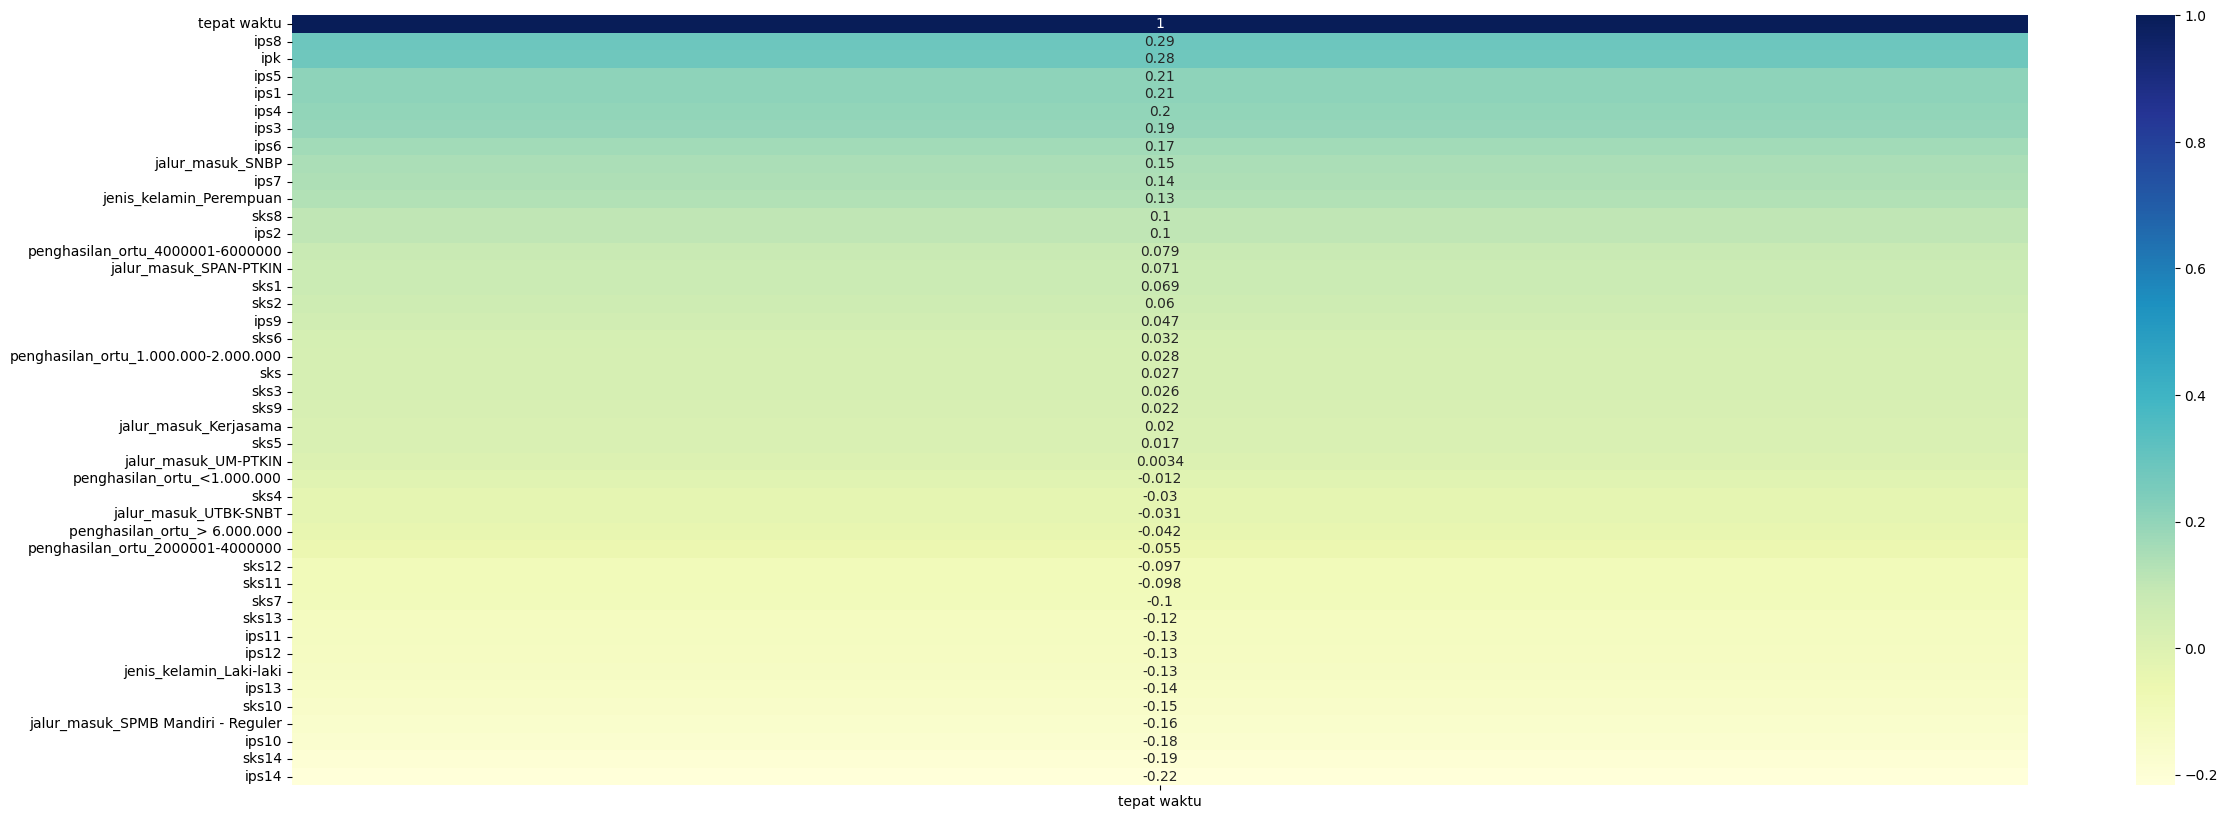

In [ ]:
# Mengatur ukuran figur untuk visualisasi
plt.figure(figsize=(28,10))

# Melihat korelasi antara variabel tepat waktu dengan variabel lainnya
sns.heatmap(data_model.corr().sort_values(by='tepat waktu', ascending=False)[['tepat waktu']], annot=True, cmap='YlGnBu')
plt.show()

In [ ]:
# Mengambil kolom 4 hingga 11 (indeks 4 sampai 10)
cols1 = data_model.columns[4:11]

# Mengambil kolom 19 hingga 25 (indeks 19 sampai 24)
cols2 = data_model.columns[19:25]

# Mengambil kolom 19 hingga 25 (indeks 32 sampai indeks terakhir)
cols3 = data_model.columns[32:]

# Menggabungkan tiga set kolom yang telah Anda pilih
selected_columns1 = cols1.append(cols2)
selected_columns2 = selected_columns1.append(cols3)

# Memilih kolom-kolom yang telah Anda gabungkan dari DataFrame
X = data_model[selected_columns2]
y = data_model['tepat waktu']

### Oversampling

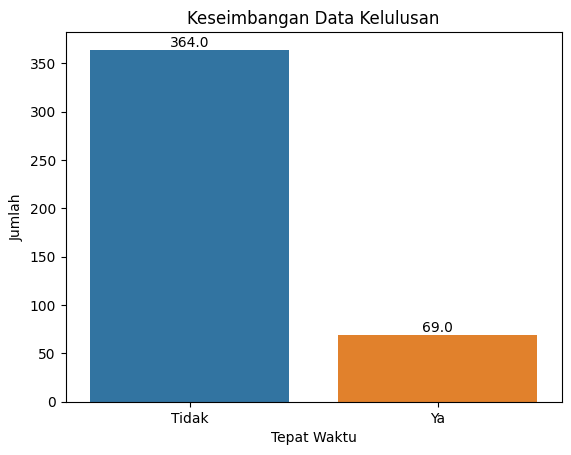

Mahasiswa lulus tepat waktu: 69
Mahasiswa tidak lulus tepat waktu: 364


In [ ]:
# Buat Visualisasi
ax = sns.countplot(x=y)
plt.xlabel('Tepat Waktu')
plt.ylabel('Jumlah')
plt.title('Keseimbangan Data Kelulusan')

# Tambahkan label pada setiap bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

plt.xticks([0, 1], ['Tidak', 'Ya'])
plt.show()

# Cek keseimbangan data
print('Mahasiswa lulus tepat waktu:', y.value_counts()[1])
print('Mahasiswa tidak lulus tepat waktu:', y.value_counts()[0])

In [ ]:
import numpy
# Inisialisasi SMOTE
smote = SMOTE(random_state=42)

# Terapkan oversampling menggunakan SMOTE
X_resampled, y_resampled = smote.fit_resample(X, y)

# Hitung jumlah sampel di setiap kelas setelah oversampling
unique, counts = numpy.unique(y_resampled, return_counts=True)
class_counts = dict(zip(unique, counts))
print("Jumlah sampel di setiap kelas setelah oversampling:", class_counts)

Jumlah sampel di setiap kelas setelah oversampling: {0: 364, 1: 364}


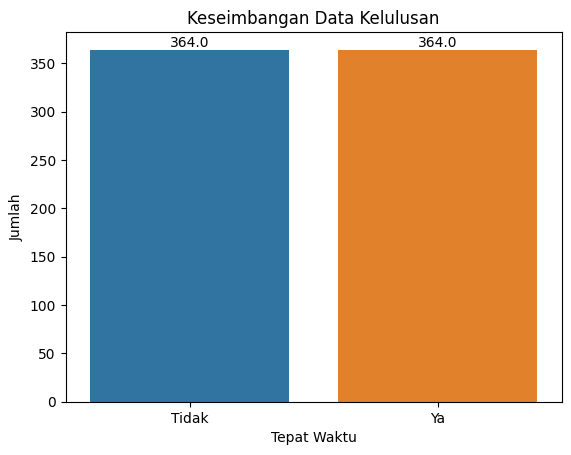

Mahasiswa lulus tepat waktu: 69
Mahasiswa tidak lulus tepat waktu: 364


In [ ]:
# Buat Visualisasi
ax = sns.countplot(x=y_resampled)
plt.xlabel('Tepat Waktu')
plt.ylabel('Jumlah')
plt.title('Keseimbangan Data Kelulusan')

# Tambahkan label pada setiap bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

plt.xticks([0, 1], ['Tidak', 'Ya'])
plt.show()

# Cek keseimbangan data
print('Mahasiswa lulus tepat waktu:', y.value_counts()[1])
print('Mahasiswa tidak lulus tepat waktu:', y.value_counts()[0])

In [ ]:
# Melakukan train test split terhadap data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = 0.2, random_state=42)
print("Jumlah data training x:", len(X_train))
print("Jumlah data training y:", len(y_train))
print("Jumlah data testing x:", len(X_test))
print("Jumlah data testing y:", len(y_test))

Jumlah data training x: 582
Jumlah data training y: 582
Jumlah data testing x: 146
Jumlah data testing y: 146


# Data Modelling

## Grid Search

In [ ]:
# Model yang akan diuji beserta parameter yang ingin diuji
models = {
    'Random Forest': (RandomForestClassifier(random_state=42), {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20]}),
    'Naive Bayes': (MultinomialNB(), {'alpha': [0.1, 0.5, 1.0]}),
    'SVM': (SVC(random_state=42), {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']})
}

# Melakukan pencarian parameter terbaik untuk setiap model
best_params = {}
for model_name, (model, param_grid) in models.items():
    grid_search = GridSearchCV(model, param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    best_params[model_name] = grid_search.best_params_

# Menampilkan parameter terbaik untuk setiap model
for model_name, params in best_params.items():
    print(f"Parameter terbaik untuk {model_name}: {params}")

Parameter terbaik untuk Random Forest: {'max_depth': None, 'n_estimators': 200}
Parameter terbaik untuk Naive Bayes: {'alpha': 0.1}
Parameter terbaik untuk SVM: {'C': 10, 'kernel': 'linear'}


## Modelling

In [ ]:
# Model-model yang akan digunakan
models = [
    ('Random Forest', RandomForestClassifier(max_depth=None, n_estimators=200, random_state=42)),
    ('Naive Bayes', MultinomialNB(alpha=0.1)),
    ('SVM', SVC(kernel='linear', C=1))
]

# Melatih dan menguji semua model
results = {}
for model_name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[model_name] = y_pred

## Evaluation Metrics

### Accuracy, Classification Report, dan AUC

In [ ]:
# Melihat hasil evaluasi
for model_name, y_pred in results.items():
    print(f"Model {model_name}:")

    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred) # Classification Report
    auc = roc_auc_score(y_test, y_pred) # AUC

    # Menampilkan hasil
    print(f"Nilai accuracy: {accuracy}")
    print(report)
    print(f"AUC: {auc}\n")

Model Random Forest:
Nilai accuracy: 0.9041095890410958
              precision    recall  f1-score   support

           0       0.92      0.92      0.92        85
           1       0.89      0.89      0.89        61

    accuracy                           0.90       146
   macro avg       0.90      0.90      0.90       146
weighted avg       0.90      0.90      0.90       146

AUC: 0.9014464802314368

Model Naive Bayes:
Nilai accuracy: 0.821917808219178
              precision    recall  f1-score   support

           0       0.89      0.79      0.84        85
           1       0.75      0.87      0.80        61

    accuracy                           0.82       146
   macro avg       0.82      0.83      0.82       146
weighted avg       0.83      0.82      0.82       146

AUC: 0.8285438765670202

Model SVM:
Nilai accuracy: 0.8904109589041096
              precision    recall  f1-score   support

           0       0.84      1.00      0.91        85
           1       1.00      0.7

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
for model_name, y_pred in results.items():
    print(f"Model {model_name}:")

    # Menghitung presisi
    precision = precision_score(y_test, y_pred)
    print(f'Presisi: {precision}')

    # Menghitung recall
    recall = recall_score(y_test, y_pred)
    print(f'Recall: {recall}')

    # Menghitung f1-score
    f1 = f1_score(y_test, y_pred)
    print(f'F1-Score: {f1}\n')

Model Random Forest:
Presisi: 0.8852459016393442
Recall: 0.8852459016393442
F1-Score: 0.8852459016393442

Model Naive Bayes:
Presisi: 0.7464788732394366
Recall: 0.8688524590163934
F1-Score: 0.803030303030303

Model SVM:
Presisi: 1.0
Recall: 0.7377049180327869
F1-Score: 0.8490566037735848



### Visualisasi

Visualisasi untuk Model Random Forest:


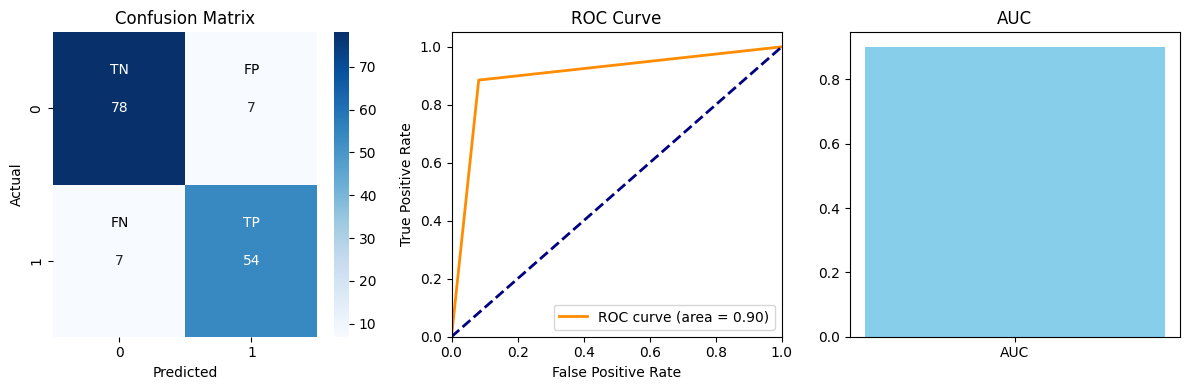

Visualisasi untuk Model Naive Bayes:


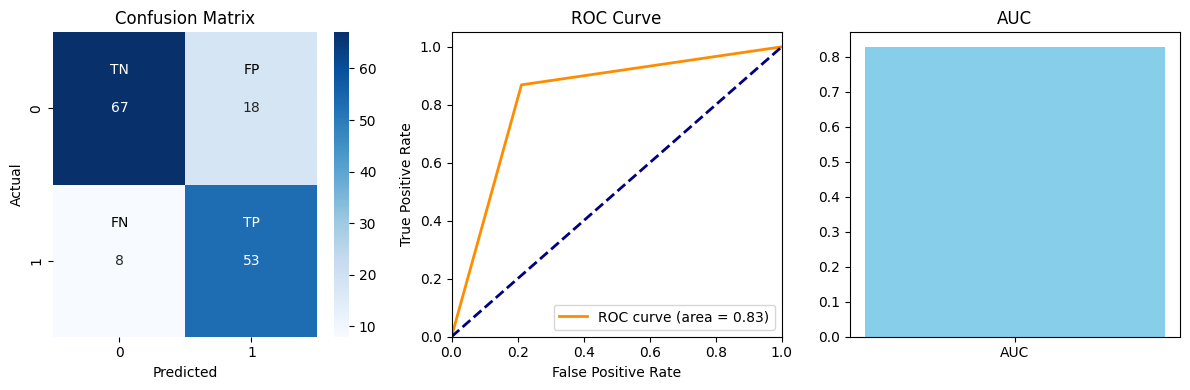

Visualisasi untuk Model SVM:


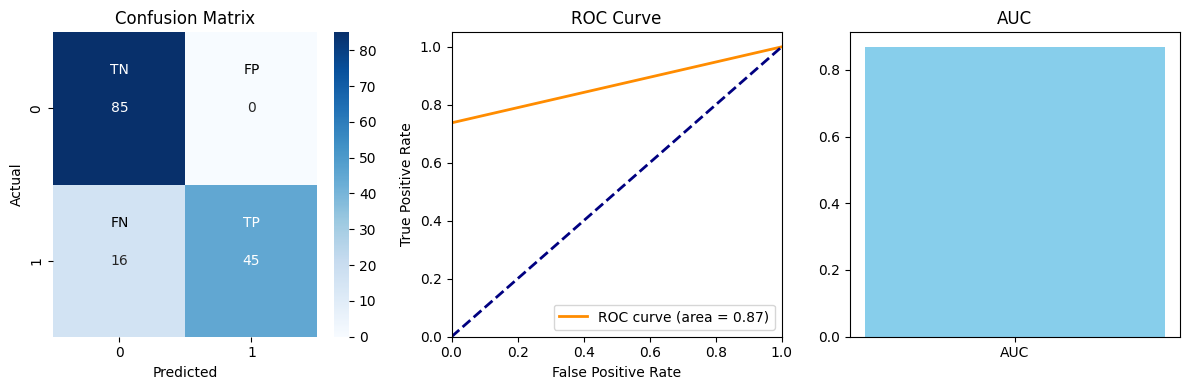

In [ ]:
import numpy
# Menampilkan confusion matrix, ROC curve, dan AUC untuk setiap model
for model_name, y_pred in results.items():
    print(f"Visualisasi untuk Model {model_name}:")

    # Menghitung confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()

    # Confusion Matrix
    plt.figure(figsize=(12, 4))
    plt.subplot(131)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")

    # Menambahkan keterangan TP, FP, FN, TN
    plt.text(0.5, 0.25, f"TN", horizontalalignment="center", verticalalignment="center", fontsize=10, color="white")
    plt.text(1.5, 0.25, f"FP", horizontalalignment="center", verticalalignment="center", fontsize=10, color="black")
    plt.text(0.5, 1.25, f"FN", horizontalalignment="center", verticalalignment="center", fontsize=10, color="black")
    plt.text(1.5, 1.25, f"TP", horizontalalignment="center", verticalalignment="center", fontsize=10, color="white")

    # ROC Curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)

    plt.subplot(132)
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")

    # AUC
    plt.subplot(133)
    plt.bar(['AUC'], [roc_auc], color='skyblue')
    plt.title('AUC')

    plt.tight_layout()
    plt.show()


### Cross Validation

In [ ]:
# Definisi skema validasi silang (StratifiedKFold)
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Membuat model Random Forest
rf_model = RandomForestClassifier(max_depth=None, n_estimators=200, random_state=42)

# Cross-validation untuk model Random Forest
rf_scores = cross_val_score(rf_model, X_train, y_train, cv=kf, scoring='accuracy')
rf_auc_scores = cross_val_score(RandomForestClassifier(), X_train, y_train, cv=5, scoring='roc_auc')
print("Cross-Validation Accuracy for Random Forest:", rf_scores)
print(f"Average Accuracy for Random Forest:", round(rf_scores.mean(), 2))
print("Cross-Validation AUC for Random Forest:", rf_auc_scores)
print("Average AUC for Random Forest:", round(rf_auc_scores.mean(), 2), "\n")

# Membuat model Naive Bayes
nb_model = MultinomialNB(alpha=0.1)

# Cross-validation untuk model Naive Bayes
nb_scores = cross_val_score(nb_model, X_train, y_train, cv=kf, scoring='accuracy')
nb_auc_scores = cross_val_score(MultinomialNB(), X_train, y_train, cv=5, scoring='roc_auc')
print("Cross-Validation Accuracy for Naive Bayes:", nb_scores)
print("Average Accuracy for Naive Bayes:", round(nb_scores.mean(), 2))
print("Cross-Validation AUC for Naive Bayes:", nb_auc_scores)
print("Average AUC for Naive Bayes:", round(nb_auc_scores.mean(), 2), "\n")

# Membuat model SVM
svm_model = SVC(kernel='linear', C=1)

# Cross-validation untuk model SVM
svm_scores = cross_val_score(svm_model, X_train, y_train, cv=kf, scoring='accuracy')
svm_auc_scores = cross_val_score(SVC(), X_train, y_train, cv=5, scoring='roc_auc')
print("Cross-Validation Accuracy for SVM:", svm_scores)
print("Average Accuracy for SVM:", round(svm_scores.mean(), 2))
print("Cross-Validation AUC for SVM:", svm_auc_scores)
print("Average AUC for SVM:", round(svm_auc_scores.mean(), 2), "\n")

Cross-Validation Accuracy for Random Forest: [0.85470085 0.90598291 0.88793103 0.93965517 0.89655172]
Average Accuracy for Random Forest: 0.9
Cross-Validation AUC for Random Forest: [0.96077283 0.96501756 0.9876304  0.91592262 0.96011905]
Average AUC for Random Forest: 0.96 

Cross-Validation Accuracy for Naive Bayes: [0.76923077 0.78632479 0.78448276 0.81896552 0.72413793]
Average Accuracy for Naive Bayes: 0.78
Cross-Validation AUC for Naive Bayes: [0.82757611 0.83870023 0.89895678 0.90029762 0.90505952]
Average AUC for Naive Bayes: 0.87 

Cross-Validation Accuracy for SVM: [0.82051282 0.86324786 0.85344828 0.87931034 0.85344828]
Average Accuracy for SVM: 0.85
Cross-Validation AUC for SVM: [0.60362998 0.75907494 0.76304024 0.62827381 0.64434524]
Average AUC for SVM: 0.68 



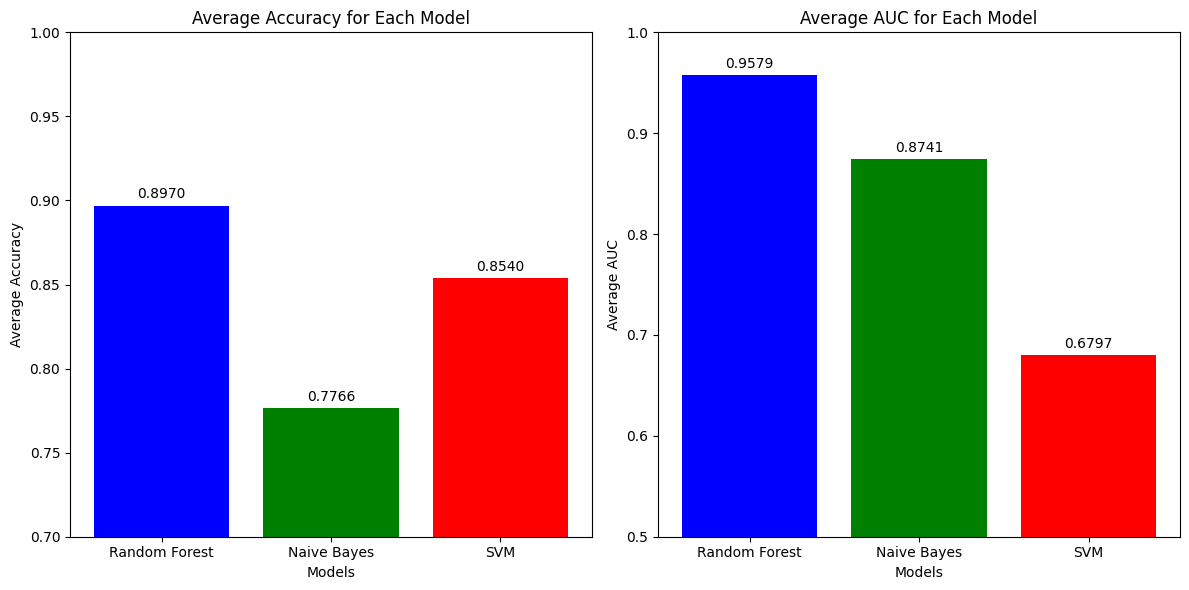

In [ ]:
# Labels model
models = ['Random Forest', 'Naive Bayes', 'SVM']

# Mengonversi list ke numpy array
rf_scores = np.array(rf_scores)
nb_scores = np.array(nb_scores)
svm_scores = np.array(svm_scores)

# Plot hasil cross-validation akurasi dan AUC
plt.figure(figsize=(12, 6))

# Plot akurasi
plt.subplot(121)
bars = plt.bar(models, [rf_scores.mean(), nb_scores.mean(), svm_scores.mean()], color=['blue', 'green', 'red'])
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height:.4f}', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3),
                 textcoords="offset points", ha='center', va='bottom')
plt.title('Average Accuracy for Each Model')
plt.xlabel('Models')
plt.ylabel('Average Accuracy')
plt.ylim(0.7, 1.0)

# Plot AUC
plt.subplot(122)
bars = plt.bar(models, [rf_auc_scores.mean(), nb_auc_scores.mean(), svm_auc_scores.mean()],
               color=['blue', 'green', 'red'])
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height:.4f}', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3),
                 textcoords="offset points", ha='center', va='bottom')
plt.title('Average AUC for Each Model')
plt.xlabel('Models')
plt.ylabel('Average AUC')
plt.ylim(0.5, 1.0)

plt.tight_layout()
plt.show()

# Testing

In [ ]:
model.predict

# No Oversampling Method


In [ ]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X, y, random_state=42, test_size=0.2)
print("Jumlah data training x:", len(X1_train))
print("Jumlah data training y:", len(y1_train))
print("Jumlah data testing x:", len(X1_test))
print("Jumlah data testing y:", len(y1_test))

In [ ]:
# Model yang akan diuji beserta parameter yang ingin diuji
models = {
    'Random Forest': (RandomForestClassifier(random_state=42), {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20]}),
    'Naive Bayes': (MultinomialNB(), {'alpha': [0.1, 0.5, 1.0]}),
    'SVM': (SVC(random_state=42), {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']})
}

# Melakukan pencarian parameter terbaik untuk setiap model
best_params = {}
for model_name, (model, param_grid) in models.items():
    grid_search = GridSearchCV(model, param_grid, cv=5)
    grid_search.fit(X1_train, y1_train)
    best_params[model_name] = grid_search.best_params_

# Menampilkan parameter terbaik untuk setiap model
for model_name, params in best_params.items():
    print(f"Parameter terbaik untuk {model_name}: {params}")

In [ ]:
# Model-model yang akan digunakan
models = [
    ('Random Forest', RandomForestClassifier(max_depth=10, n_estimators=300, random_state=42)),
    ('Naive Bayes', MultinomialNB(alpha=1)),
    ('SVM', SVC(kernel='linear', C=0.1))
]

# Melatih dan menguji semua model
results = {}
for model_name, model in models:
    model.fit(X1_train, y1_train)
    y1_pred = model.predict(X1_test)
    results[model_name] = y1_pred

In [ ]:
# Melihat hasil evaluasi
for model_name, y1_pred in results.items():
    print(f"Model {model_name}:")

    accuracy = accuracy_score(y1_test, y1_pred)
    report = classification_report(y1_test, y1_pred) # Classification Report
    auc = roc_auc_score(y1_test, y1_pred) # AUC

    # Menampilkan hasil
    print(f"Nilai accuracy: {accuracy}")
    print(report)
    print(f"AUC: {auc}\n")

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
for model_name, y1_pred in results.items():
    print(f"Model {model_name}:")

    # Menghitung presisi
    precision = precision_score(y1_test, y1_pred)
    print(f'Presisi: {precision}')

    # Menghitung recall
    recall = recall_score(y1_test, y1_pred)
    print(f'Recall: {recall}')

    # Menghitung f1-score
    f1 = f1_score(y1_test, y1_pred)
    print(f'F1-Score: {f1}\n')

In [ ]:
import numpy
# Menampilkan confusion matrix, ROC curve, dan AUC untuk setiap model
for model_name, y1_pred in results.items():
    print(f"Visualisasi untuk Model {model_name}:")

    # Menghitung confusion matrix
    cm = confusion_matrix(y1_test, y1_pred)
    tn, fp, fn, tp = cm.ravel()

    # Confusion Matrix
    plt.figure(figsize=(12, 4))
    plt.subplot(131)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")

    # Menambahkan keterangan TP, FP, FN, TN
    plt.text(0.5, 0.25, f"TN", horizontalalignment="center", verticalalignment="center", fontsize=10, color="white")
    plt.text(1.5, 0.25, f"FP", horizontalalignment="center", verticalalignment="center", fontsize=10, color="black")
    plt.text(0.5, 1.25, f"FN", horizontalalignment="center", verticalalignment="center", fontsize=10, color="black")
    plt.text(1.5, 1.25, f"TP", horizontalalignment="center", verticalalignment="center", fontsize=10, color="white")

    # ROC Curve
    fpr, tpr, thresholds = roc_curve(y1_test, y1_pred)
    roc_auc = auc(fpr, tpr)

    plt.subplot(132)
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")

    # AUC
    plt.subplot(133)
    plt.bar(['AUC'], [roc_auc], color='skyblue')
    plt.title('AUC')

    plt.tight_layout()
    plt.show()


In [ ]:
# Definisi skema validasi silang (StratifiedKFold)
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Membuat model Random Forest
rf_model = RandomForestClassifier(max_depth=10, n_estimators=300, random_state=42)

# Cross-validation untuk model Random Forest
rf_scores = cross_val_score(rf_model, X1_train, y1_train, cv=kf, scoring='accuracy')
rf_auc_scores = cross_val_score(RandomForestClassifier(), X1_train, y1_train, cv=5, scoring='roc_auc')
print("Cross-Validation Accuracy for Random Forest:", rf_scores)
print(f"Average Accuracy for Random Forest:", round(rf_scores.mean(), 2))
print("Cross-Validation AUC for Random Forest:", rf_auc_scores)
print("Average AUC for Random Forest:", round(rf_auc_scores.mean(), 2), "\n")

# Membuat model Naive Bayes
nb_model = MultinomialNB(alpha=1)

# Cross-validation untuk model Naive Bayes
nb_scores = cross_val_score(nb_model, X1_train, y1_train, cv=kf, scoring='accuracy')
nb_auc_scores = cross_val_score(MultinomialNB(), X1_train, y1_train, cv=5, scoring='roc_auc')
print("Cross-Validation Accuracy for Naive Bayes:", nb_scores)
print("Average Accuracy for Naive Bayes:", round(nb_scores.mean(), 2))
print("Cross-Validation AUC for Naive Bayes:", nb_auc_scores)
print("Average AUC for Naive Bayes:", round(nb_auc_scores.mean(), 2), "\n")

# Membuat model SVM
svm_model = SVC(kernel='linear', C=0.1)

# Cross-validation untuk model SVM
svm_scores = cross_val_score(svm_model, X1_train, y1_train, cv=kf, scoring='accuracy')
svm_auc_scores = cross_val_score(SVC(), X1_train, y1_train, cv=5, scoring='roc_auc')
print("Cross-Validation Accuracy for SVM:", svm_scores)
print("Average Accuracy for SVM:", round(svm_scores.mean(), 2))
print("Cross-Validation AUC for SVM:", svm_auc_scores)
print("Average AUC for SVM:", round(svm_auc_scores.mean(), 2), "\n")

In [ ]:
Parameter terbaik untuk Random Forest: {'max_depth': 10, 'n_estimators': 300}
Parameter terbaik untuk Naive Bayes: {'alpha': 1.0}
Parameter terbaik untuk SVM: {'C': 0.1, 'kernel': 'linear'}

In [ ]:
# Labels model
models = ['Random Forest', 'Naive Bayes', 'SVM']

# Mengonversi list ke numpy array
rf_scores = np.array(rf_scores)
nb_scores = np.array(nb_scores)
svm_scores = np.array(svm_scores)

# Plot hasil cross-validation akurasi dan AUC
plt.figure(figsize=(12, 6))

# Plot akurasi
plt.subplot(121)
bars = plt.bar(models, [rf_scores.mean(), nb_scores.mean(), svm_scores.mean()], color=['blue', 'green', 'red'])
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height:.4f}', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3),
                 textcoords="offset points", ha='center', va='bottom')
plt.title('Average Accuracy for Each Model')
plt.xlabel('Models')
plt.ylabel('Average Accuracy')
plt.ylim(0.7, 1.0)

# Plot AUC
plt.subplot(122)
bars = plt.bar(models, [rf_auc_scores.mean(), nb_auc_scores.mean(), svm_auc_scores.mean()],
               color=['blue', 'green', 'red'])
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height:.4f}', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3),
                 textcoords="offset points", ha='center', va='bottom')
plt.title('Average AUC for Each Model')
plt.xlabel('Models')
plt.ylabel('Average AUC')
plt.ylim(0.5, 1.0)

plt.tight_layout()
plt.show()

# Prediksi Angkatan 2019

In [ ]:
data_2019 = merge_df[merge_df['tahun_masuk']==2019]
data_2019.drop([
              'kota','usia','tahun_lulus','status','tahun_masuk',
              'lama studi','usia_masuk','usia_kelulusan','tepat waktu'
              ], axis=1, inplace=True)
data_2019.dropna(inplace=True)

# 'nim'

data_2019 = pd.get_dummies(data_2019, columns=['jenis_kelamin','jalur_masuk','penghasilan_ortu'], prefix=None)
data_2019 = data_2019.reset_index(drop=True)

# Mengambil kolom 4 hingga 11 (indeks 4 sampai 10)
cols1 = data_2019.columns[4:11]

# Mengambil kolom 19 hingga 25 (indeks 19 sampai 24)
cols2 = data_2019.columns[18:25]

# Mengambil kolom 19 hingga 25 (indeks 32 sampai indeks terakhir)
cols3 = data_2019.columns[32:]

# Menggabungkan tiga set kolom yang telah Anda pilih
selected_columns1 = cols1.append(cols2)
selected_columns2 = selected_columns1.append(cols3)

# Memilih kolom-kolom yang telah Anda gabungkan dari DataFrame
X_2019 = data_2019[selected_columns2]

X_2019['jalur_masuk_Kerjasama'] = 0
X_2019['jalur_masuk_SPAN-PTKIN'] = 0
X_2019['jalur_masuk_UM-PTKIN'] = 0

X_2019 = X_2019.reset_index(drop=True)
X_2019

In [ ]:
X_test = X_2019.reindex(X_train.columns, axis=1, fill_value=0)

# Model Random Forest
rf_model = RandomForestClassifier(max_depth=None, n_estimators=200, random_state=42)

# Melatih model Random Forest
rf_model.fit(X_train, y_train)

# Melakukan prediksi dengan model Random Forest
y_pred_rf = rf_model.predict(X_test)

# Menyimpan hasil prediksi
results['Random Forest'] = y_pred_rf

# Menampilkan akurasi model Random Forest
print(results['Random Forest'])

In [ ]:
!pip install xlwt

In [ ]:
predict_2019 = pd.DataFrame(results['Random Forest'])
data_prediksi = data_2019.iloc[:,:2].merge(predict_2019, left_index=True, right_index=True)
data_prediksi.to_excel('data prediksi 2019.xls')

# Prediksi Angkatan 2020

In [ ]:
data_2020 = merge_df[merge_df['tahun_masuk']==2020]
data_2020.drop([
              'nim','kota','usia','tahun_masuk','tahun_lulus','status',
              'lama studi','usia_masuk','usia_kelulusan','tepat waktu'
              ], axis=1, inplace=True)
data_2020.dropna(inplace=True)

data_2020 = pd.get_dummies(data_2020, columns=['jenis_kelamin','jalur_masuk','penghasilan_ortu'], prefix=None)

# Mengambil kolom 4 hingga 11 (indeks 4 sampai 10)
cols1 = data_2020.columns[3:10]

# Mengambil kolom 19 hingga 25 (indeks 19 sampai 24)
cols2 = data_2020.columns[18:24]

# Mengambil kolom 19 hingga 25 (indeks 32 sampai indeks terakhir)
cols3 = data_2020.columns[31:]

# Menggabungkan tiga set kolom yang telah Anda pilih
selected_columns1 = cols1.append(cols2)
selected_columns2 = selected_columns1.append(cols3)

# Memilih kolom-kolom yang telah Anda gabungkan dari DataFrame
X_2020 = data_2020[selected_columns2]

X_2020['jalur_masuk_Kerjasama'] = 0
X_2020['jalur_masuk_SPAN-PTKIN'] = 0
X_2020['jalur_masuk_UM-PTKIN'] = 0

X_2020

# Predict 2020

In [ ]:
X_test = X_2020.reindex(X_train.columns, axis=1, fill_value=0)

# Model Random Forest
rf_model = RandomForestClassifier(max_depth=None, n_estimators=200, random_state=42)

# Melatih model Random Forest
rf_model.fit(X_train, y_train)

# Melakukan prediksi dengan model Random Forest
y_pred_rf = rf_model.predict(X_test)

# Menyimpan hasil prediksi
results['Random Forest'] = y_pred_rf

# Menampilkan akurasi model Random Forest
print(results['Random Forest'])

In [ ]:
len(results['Random Forest'])